# Scraping Vietnamese data using `pd.read_html()`

[pd.read_html()](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html#pandas.read_html) reads html tables in specified web page into a list.

Useful parameters for `pd.read_html()` include: `attrs`, `parse_dates`, `thousands`, `encoding`, `decimal`, `match` and `converters`.

In [1]:
import os, sys
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

# libpaths = [os.path.expanduser('../utils')]
# for libpath in libpaths:
#     if libpath not in sys.path:
#         sys.path.append(libpath)
# from elle import uu
# import el_utils as elu

# https://pbpython.com/pandas-html-table.html
# https://scipython.com/blog/scraping-a-wikipedia-table-with-pandas/
# https://medium.com/@nutanbhogendrasharma/extract-table-data-from-wikipedia-using-web-scraping-with-python-d13505ecdc9c

PAGE = "https://vi.wikipedia.org/wiki/Nh%C3%A2n_kh%E1%BA%A9u_Vi%E1%BB%87t_Nam"

# tables = pd.read_html(PAGE)
# print(f'Total tables: {len(tables)}')

In [2]:
# Since the table has no id attribute, use table caption to target specific table in webpage
caption = 'Lịch sử dân số'
clean_percentages = lambda x: x.replace('+', "").replace('%', "").replace("—", str(np.NaN))
conv = {"±% năm": clean_percentages}
table = pd.read_html(PAGE, match=caption, encoding="utf-8", converters=conv, thousands=".", decimal=",")

In [7]:
# if only one table in result set, define df, otherwise exit
df = None
if len(table) == 1:
    df = table[0]
if df is None:
    exit(1)

#last row is garbage data, remove last row
df = df[:-1]
# Copy dataframe
df_new = df.copy()
df_new.head(5)

,Năm,Số dân,±% năm
0,1990,66016700,NaN
1,1991,67242400,1.86
2,1992,68450100,1.80
3,1993,69644500,1.74
4,1994,70824500,1.69


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Năm     31 non-null     object
 1   Số dân  31 non-null     object
 2   ±% năm  30 non-null     object
dtypes: object(3)
memory usage: 872.0+ bytes


In [5]:
df_new["Số dân"] = df_new["Số dân"].astype('int64')
df_new["±% năm"] = df_new["±% năm"].astype('float64')
df_new['Năm'] = pd.to_datetime(df_new['Năm']).dt.year
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Năm     31 non-null     int64  
 1   Số dân  31 non-null     int64  
 2   ±% năm  30 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 872.0 bytes


<AxesSubplot:xlabel='Năm'>

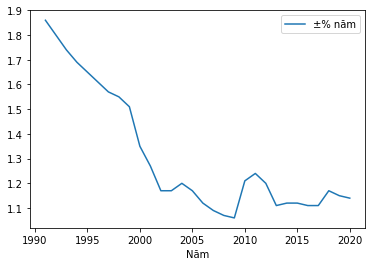

In [6]:
import matplotlib.pyplot as plt
df_new.plot(x='Năm', y="±% năm")